In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dataframes:

In [4]:
path = r'../data/MKT.csv'

df = pd.read_csv(
    filepath_or_buffer=path,
    decimal='.',
    sep=',',
)

In [5]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [6]:
display(df.head(5))

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# Código:

In [7]:
class Challenge():
    # Data Understanding:
    def verificando_as_dimensões_do_dataframe(self, df):
        df = df.shape
        print(f'Linhas: {df[0]} \nColunas: {df[1]}')

    def descrição(self, df):
        df = df.describe().round(decimals=2)
        display(df)

    def verificando_valores_nulos(self, df):
        valores_nulos = df.isnull().sum()
        percent_missing = (valores_nulos / len(df))
        df = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        display(df)

    def verificando_valores_duplicados(self, df):
        valores_repetidos = df.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(df))
        df = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=df.columns
        )

        df = df.style.format('{:.2%}', subset=['Porcentagem'])
        display(df)
    
    def verificando_tipos(self, df):
        df = (
            df.dtypes
            .to_frame('Tipos')
        )
        display(df)

    def verificando_a_distribuição(self, df, coluna):
        sns.histplot(data=df[coluna])

    def identificando_outliers(self, df):
        """
            Boxplot dos salários por nível de experiência
        """
        df = df.apply(scale)
        sns.boxplot(data=df)

    def gráfico_de_correlação(self, df):
        """
            Plotando o mapa de calor usando a biblioteca Seaborn
        """
        sns.set(style='white')
        corr = df.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def investimento_por_plataforma(self, df):
        dataframe = pd.DataFrame(df.sum()).reset_index()

        dataframe.rename(
            columns = {
                'index': 'plataforma', 
                0:'investimento_total'
            }
            ,inplace = True
        )

        return dataframe
    
    def gráfico_de_barras(self, df, x, y):
        sns.barplot(
            data=df,
            x=x,
            y=y
        )

    # Data Preparation:
    """
        Os dados estão ótimos.
    """

    # Modeling:
    def treinamento(self, df, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x,
            y,
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'r_quadrado: {r2}')

        return treinamento, y_pred, y_test
    
    def gráfioc_de_linha(self, y_true, y_pred):
        index = [i for i in range(1, 53, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')

    def previsão(self, treinamento, entrada):
        y_pred = treinamento.predict(entrada)
        print(y_pred)
        return y_pred


if __name__ == '__main__':
    challenge = Challenge()

# Output:

## Data Understanding:

In [8]:
challenge.verificando_as_dimensões_do_dataframe(df=df)

Linhas: 171 
Colunas: 4


In [9]:
challenge.descrição(df=df)

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


In [10]:
challenge.verificando_valores_nulos(df=df)

,Quantidade,Porcentagem
youtube,0,0.0
facebook,0,0.0
newspaper,0,0.0
sales,0,0.0


In [11]:
challenge.verificando_valores_duplicados(df=df)

,Quantidade,Porcentagem
youtube,6,3.51%
facebook,26,15.20%
newspaper,23,13.45%
sales,59,34.50%


In [12]:
challenge.verificando_tipos(df=df)

,Tipos
youtube,float64
facebook,float64
newspaper,float64
sales,float64


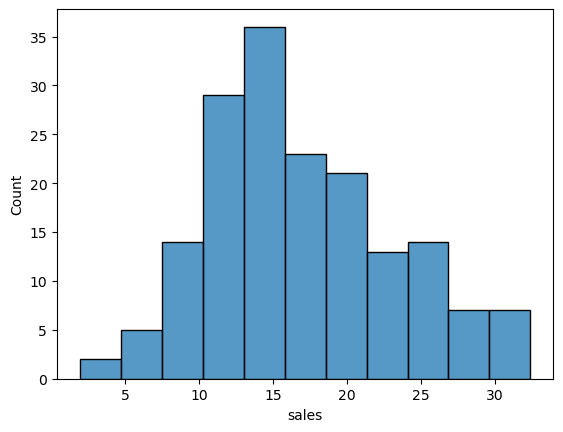

In [13]:
challenge.verificando_a_distribuição(df=df, coluna='sales')

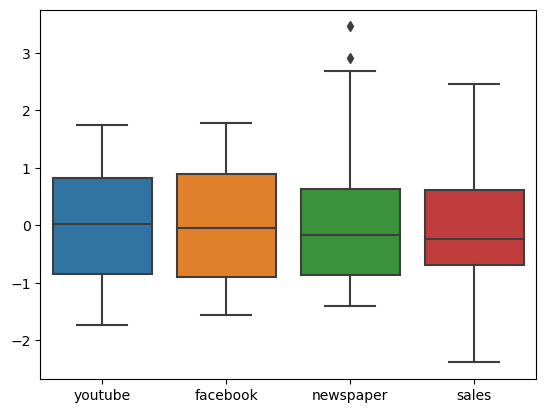

In [14]:
challenge.identificando_outliers(df=df)

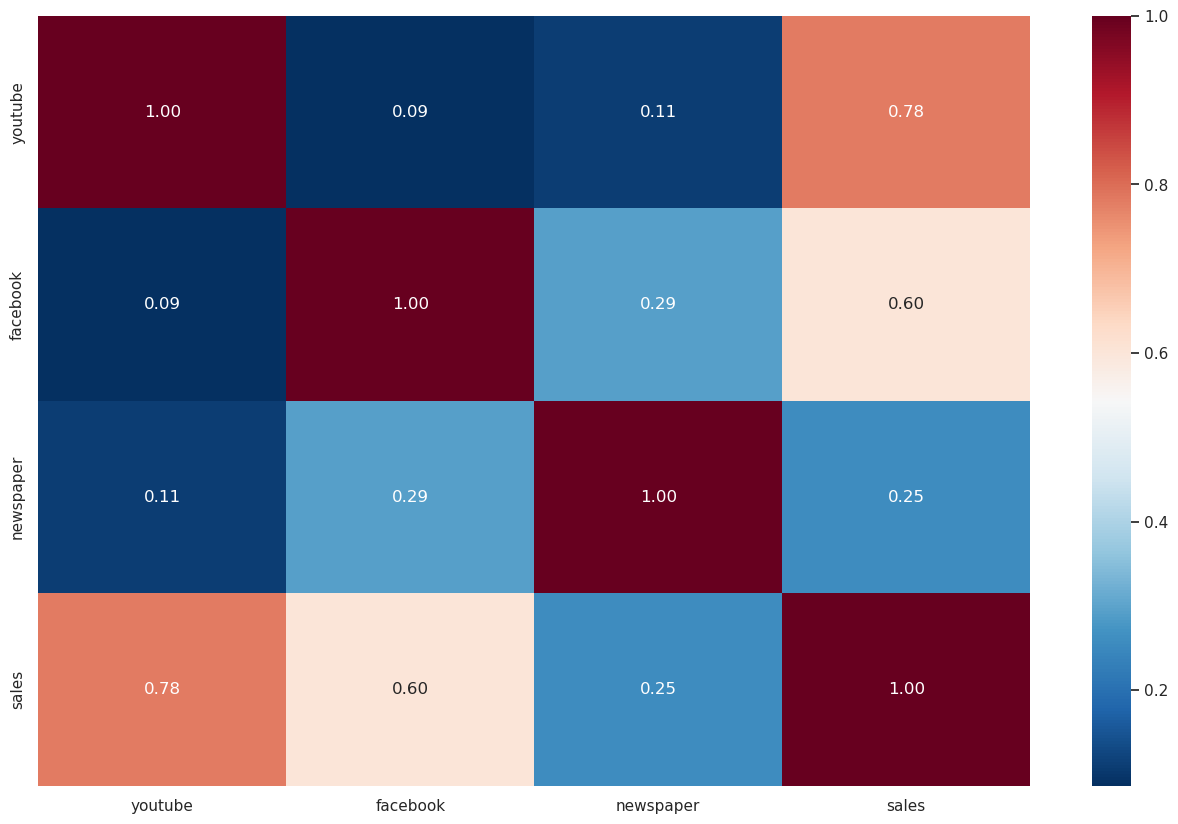

In [15]:
challenge.gráfico_de_correlação(df=df)

### Investimento por plataforma:

In [16]:
entrada = df[['youtube', 'facebook', 'newspaper']]
investimento_por_plataforma = challenge.investimento_por_plataforma(df=entrada)

In [17]:
display(investimento_por_plataforma)

,plataforma,investimento_total
0,youtube,30441.60
1,facebook,4731.84
2,newspaper,6026.04


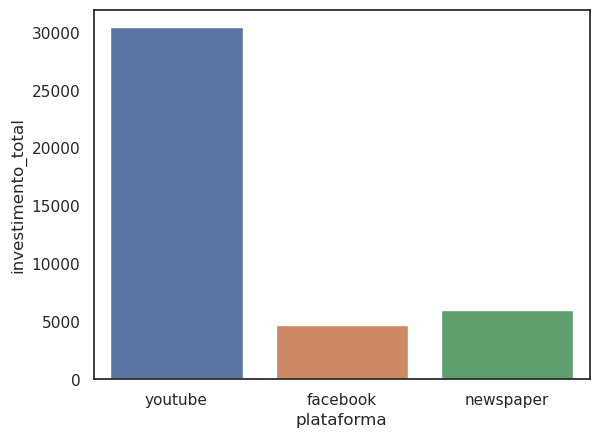

In [18]:
challenge.gráfico_de_barras(
    df=investimento_por_plataforma,
    x='plataforma',
    y='investimento_total',
)

## Data Preparation:

In [19]:
#Limpisimo

## Modeling:

### Treinando o modelo:

In [20]:
x = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

treinamento, y_pred, y_test = challenge.treinamento(
    df=df,
    x=x,
    y=y,
);

r_quadrado: 0.9104255480117941


### Verificando o desempenho do modelo:

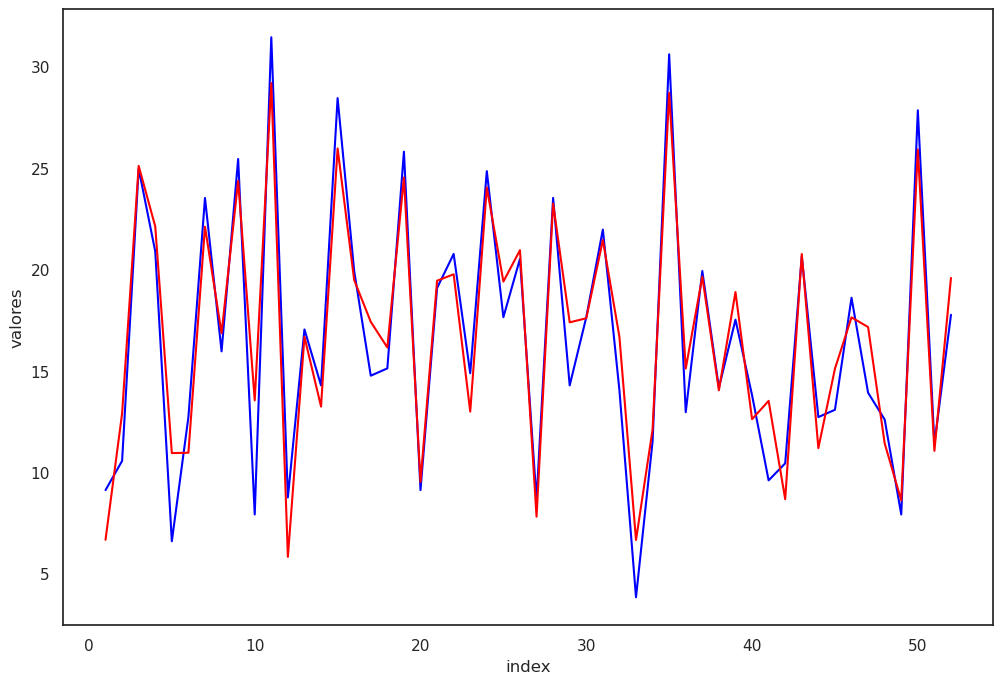

In [21]:
challenge.gráfioc_de_linha(y_true=y_test, y_pred=y_pred)

### Realizando as predições:

In [22]:
youtube, facebook, newspaper = 300, 100, 20
entrada = [[youtube, facebook, newspaper]]

challenge.previsão(
    treinamento=treinamento,
    entrada=entrada
);

[36.07901045]


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
entrada = df[['youtube', 'facebook', 'newspaper']]

df['predition'] = challenge.previsão(
    treinamento=treinamento,
    entrada=entrada
)

[11.42582305 25.81499708 13.92383301  9.36256464 22.11495005  9.06845796
 19.81289079 27.72147885 19.39730693 12.42336261 24.52587497 19.64208554
 20.94518511 25.35870702 16.61421304 11.329081   18.26668701 10.96320707
 25.90547786 19.57748656 10.20626524 15.09161607 11.17426668 24.91355717
 24.36396379 24.13117432 25.95962386 10.94438022 15.35978406 26.43221729
 21.5401599   7.13861537 27.60187399 19.94236164 15.95552119 20.65322636
  9.4537058  11.05539009 14.37988349 22.47705535 25.3365868  21.44418722
 12.98784975 12.89868566 12.0137241  20.5805159  15.45689379  5.69205157
 16.67392795 10.98815612 11.71089118 14.04060802 17.41642032 12.59207174
 17.85215123 25.01395929 18.55031789 14.16639784 19.38038931 14.81728329
 20.89637968 11.89486854  5.83114576 23.25223775 25.7805887  12.61625592
 19.94032843 14.82458343 18.34704567 28.95213631 20.75701332 16.67069106
 28.33818066 20.76501954 17.5895672  24.04092875 22.09494031  7.81121734
  8.67457361  4.71001465 23.22474473 17.80535829 25

In [24]:
df.head(5)

,youtube,facebook,newspaper,sales,predition
0,84.72,19.20,48.96,12.60,11.425823
1,351.48,33.96,51.84,25.68,25.814997
2,135.48,20.88,46.32,14.28,13.923833
3,116.64,1.80,36.00,11.52,9.362565
4,318.72,24.00,0.36,20.88,22.114950


# Conclusão:

Com base no estudo realizado, percebemos que o investimento em jornais `newspaper` apresenta a menor correlação em relação às vendas. No entanto, é o segundo maior investimento em marketing definido pela empresa. Por outro lado, o `Facebook` possui uma correlação maior em relação ao `newspaper`, mesmo com um investimento 21% menor. Já o `YouTube` possui um valor investido em marketing 61% maior do que o investimento combinado do `Facebook` e do `newspaper`. Além disso, a correlação entre as vendas e o investimento no `YouTube` é a maior em relação a todas as outras plataformas citadas. No entanto, isso pode ser consequência do alto investimento no `YouTube` em comparação com as demais plataformas.

Com base nesses resultados, recomendamos aumentar o investimento no `Facebook` em 21% e monitorar o desempenho das vendas após o aumento. É importante verificar a correlação entre as vendas e o investimento no `Facebook`. Em relação ao investimento em jornais, ele deve ser reduzido em 21%. Aconselhamos também uma diminuição gradual no investimento no `YouTube` e realocação desses recursos no `Facebook`. Caso a correlação entre as vendas e o investimento no `YouTube` não diminua, isso indica que estamos no caminho certo. Além disso, é importante observar se a taxa de conversão através do `YouTube` não está diminuindo.

Para aprimorar a coleta de dados, é aconselhável registrar a data em que cada um desses investimentos foi feito, para que possamos avaliar o tempo de observação. Dessa forma, poderemos replicar essas análises no próximo estudo sobre o `Facebook`. Outra adição importante seria considerar a taxa de conversão por plataforma.

Em conclusão, recomendamos seguir as orientações mencionadas acima e monitorar as KPIs citadas para verificar os resultados das recomendações.